In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")
from read_tfrecords import OccnetTfrecordLoader
from models.research.keypointnet.main import Transformer
# from models.research.keypointnet.main import *

In [2]:
import cv2
import math

In [3]:
sess = tf.Session()

In [4]:
vw, vh = 128, 128

In [5]:
occnet_dataloader = OccnetTfrecordLoader("../datasets/00004/", occnet_data=True)
occnet_transformer = Transformer(128, 128, "../datasets/00004/", occnet=True)
occnet_features = occnet_dataloader.get_features()
# features = sess.run(features)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


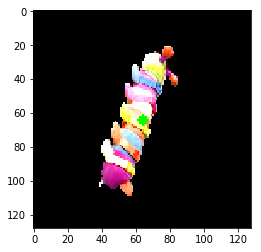

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


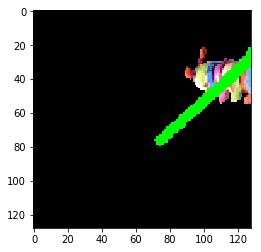

In [6]:
def func1(x):
    return tf.transpose(tf.reshape(occnet_features[x], [-1, 4, 4]), [0, 2, 1])

mv = [func1("mv%d" % i) for i in range(2)]
mvi = [func1("mvi%d" % i) for i in range(2)]
img0_depth = tf.reshape(occnet_features["img0_depth"], [-1, 480, 640])

u, v = 0.0, 0.0
points = []
for z in np.linspace(-0.5, 0.5, num=100):
    z_value = (img0_depth[0, 240, 320] / 1000.0) + z
    points.append([u, v, z_value])

# add back batch dimension
uvz = tf.expand_dims(tf.convert_to_tensor(points), axis=0)

world_coords = tf.matmul(occnet_transformer.unproject(uvz), mvi[0])
uvz_proj = occnet_transformer.project(tf.matmul(world_coords, mv[1 - 0]))

uvz, uvz_proj, img0, img1, img0_depth = sess.run(
    [
        uvz,
        uvz_proj,
        occnet_features["img0"][0, :, :, :3],
        occnet_features["img1"][0, :, :, :3],
        img0_depth
    ]
)

# draw on the image
x = int((u + 1.0) * 64.0)
y = int((v + 1.0) * 64.0)
new_img0 = cv2.circle(img0.copy(), (x, y), 3, (0, 255, 0), -1)
plt.imshow(new_img0)
plt.show()

new_img1 = img1.copy()
for index, point in enumerate(uvz_proj[0]):
#     print(index)
#     print(point)
    try:
        u, v, z = point
        
#         x = int((u + 1.0) * 64.0)
#         y = 128 - int((v + 1.0) * 64.0)
        
        x = (min(max(u, -1), 1) * vw / 2 + vw / 2) - 0.5
        y = vh - 0.5 - (min(max(v, -1), 1) * vh / 2 + vh / 2)
        if math.isnan(x) or math.isnan(y):
            pass

        x = int(round(x))
        y = int(round(y))

        new_img1 = cv2.circle(new_img1, (x, y), 3, (0, 255, 0), -1)
    except:
        pass

plt.imshow(new_img1)
plt.show()

# plt.imshow(img0_depth[0])
# plt.show()


In [7]:
keypointnet_dataloader = OccnetTfrecordLoader("../../data/cars_with_keypoints/", occnet_data=False)
keypointnet_transformer = Transformer(128, 128, "../../data/cars_with_keypoints/", occnet=False)
keypointnet_features = keypointnet_dataloader.get_features()
# keypointnet_features = sess.run(keypointnet_features)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


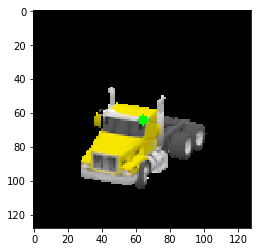

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


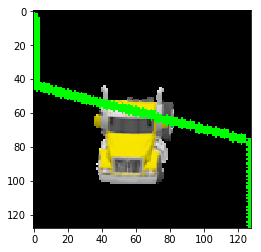

In [8]:
def func1(x):
    return tf.transpose(tf.reshape(keypointnet_features[x], [-1, 4, 4]), [0, 2, 1])

mv = [func1("mv%d" % i) for i in range(2)]
mvi = [func1("mvi%d" % i) for i in range(2)]

u, v = 0.0, 0.0
points = []
for z in np.linspace(-50.0, 0.0, num=200):
    points.append([u, v, z])
    
uvz = tf.constant([points])

world_coords = tf.matmul(keypointnet_transformer.unproject(uvz), mvi[0])
uvz_proj = keypointnet_transformer.project(tf.matmul(world_coords, mv[1 - 0]))

uvz, uvz_proj, img0, img1 = sess.run(
    [
        uvz,
        uvz_proj,
        keypointnet_features["img0"][0, :, :, :3],
        keypointnet_features["img1"][0, :, :, :3]
    ]
)

# draw on the image
x = int((u + 1.0) * 64.0)
y = int((v + 1.0) * 64.0)
new_img0 = cv2.circle(img0.copy(), (x, y), 3, (0, 255, 0), -1)
plt.imshow(new_img0)
plt.show()

new_img1 = img1.copy()
for index, point in enumerate(uvz_proj[0]):
#     print(index)
#     print(point)

    u, v, z = point
    # ---
#     x = int((u + 1.0) * 64.0)
#     y = 128 - int((v + 1.0) * 64.0)
    # OR
    x = (min(max(u, -1), 1) * vw / 2 + vw / 2) - 0.5
    y = vh - 0.5 - (min(max(v, -1), 1) * vh / 2 + vh / 2)
    x = int(round(x))
    y = int(round(y))
    
    new_img1 = cv2.circle(new_img1, (x, y), 3, (0, 255, 0), -1)

plt.imshow(new_img1)
plt.show()
